<a href="https://colab.research.google.com/github/Darnel-KOUA/Darnel_KOUA_Project/blob/main/PROJET_I_BENIE_KONAN_KOUA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJET I MACHINE LEARNING 2

###  ___Web scraping

>***Noms et Prénoms***

>- ***BENIE*** Alvin Emmanuel (ISE2B)

>- ***KONAN KOUASSI*** Aimé Tresor (ISE2A)

>- ***KOUA*** Darnel Jean'Scar (ISE2B)

## Plan
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#part1">Partie I</a></li>
<li><a href="#part2">Partie II</a></li>
<li><a href="#part3">Partie III</a></li>
<li><a href="#conclu">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTMIABrx2zCeZExf4_csKCU0VVyz3IIFS59PA&usqp=CAU)

> Le web scraping est devenu un outil inestimable pour les professionnels de la statistique et du machine learning, permettant d'accéder rapidement à de vastes quantités de données à partir de sites Web et de les transformer en informations exploitables. Dans ce travail de machine learning 2, nous allons nous concentrer sur le web scraping d'un site de météo pour collecter des données météorologiques en temps réel à partir de différentes sources en ligne. L'objectif de cette étude est d'exploiter ces données afin d'analyser la dynamique d'évolution de certains KPI  pour diverses localités.

> Ce projet est divisé en trois parties:
>- Dans première partie nous construisons deux fonctions, une appelée **getPays()** qui prend en argument l'url d'un continent et renvois les url des pays et leur nom et l'autre appelée **getRegion()** qui pour un pays donné renvoit les url et noms des regions du pays.
>- Dans la deuxième partie nous construisons une fonction nommée **getDayData()** qui collecte tous les KPI disponibles sur la plateforme pour une région donnée.
>- Enfin dans la troisième partie, nous contruisons la fonction **getData** qui prend en paramètre l'url pays, les années pour lesquelles l'on souhaite avoir les données et fournit un dataframe qui contient l'ensemble des KPIs pour l'ensenble des régions du pays choisi tout en enregistrant les données receuillis sous format csv.

In [2]:
# Les librairies
from bs4 import BeautifulSoup
import requests
import pandas as pd
import os
from slugify import slugify
from calendar import monthrange
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from tqdm import tqdm
import time
%matplotlib inline

<a id='part1'></a>
## Partie I :

## Création de la fonction **getPays(url)**

In [3]:
#Création de la fonction getPays
def getPays(url):
    base="https://www.historique-meteo.net"
    Resultats = []
    r = requests.get(url)

    soup = BeautifulSoup(r.content, 'html.parser')
    results = soup.find_all('li', class_='item-thumbs col-sm-4 col-md-3 col-xs-6')
    for res in results:
        link = res.find(name="a", attrs={'class' : 'hover-wrap fancybox'})
        link_pays = link.get('href')
        url_pays = base+str(link_pays)
        nom = res.find(name='div', attrs={'class' : 'item-text'})
        nom_pays = nom.getText()
        url_nom = (url_pays, nom_pays)
        Resultats.append(url_nom)
    return Resultats

In [4]:
#Test
getPays("https://www.historique-meteo.net/afrique")

[('https://www.historique-meteo.net/afrique/afrique-du-sud/',
  "L'Afrique du Sud"),
 ('https://www.historique-meteo.net/afrique/algerie/', "L'Algérie"),
 ('https://www.historique-meteo.net/afrique/angola/', "L'Angola"),
 ('https://www.historique-meteo.net/afrique/benin/', 'Le Bénin'),
 ('https://www.historique-meteo.net/afrique/botswana/', 'Le Botswana'),
 ('https://www.historique-meteo.net/afrique/burkina-faso/', 'Le Burkina Faso'),
 ('https://www.historique-meteo.net/afrique/burundi/', 'Le Burundi'),
 ('https://www.historique-meteo.net/afrique/cameroun/', 'Le Cameroun'),
 ('https://www.historique-meteo.net/afrique/cap-vert/', 'Le Cap-Vert'),
 ('https://www.historique-meteo.net/afrique/comores/', 'Les Comores'),
 ('https://www.historique-meteo.net/afrique/congo/',
  'Le Congo-Brazzaville (République du Congo)'),
 ('https://www.historique-meteo.net/afrique/cote-d-ivoire/',
  "La Côte d'Ivoire"),
 ('https://www.historique-meteo.net/afrique/djerba/', 'Djerba'),
 ('https://www.historique

In [5]:
#Stocker dans un dataFrame et enregistrer sous format csv
pays_afrique = getPays("https://www.historique-meteo.net/afrique")
df = pd.DataFrame(pays_afrique, columns= ['url', 'nom'])
df.to_csv('pays_afrique.csv', index=False)

In [6]:
#test
df.head()

,url,nom
0,https://www.historique-meteo.net/afrique/afriq...,L'Afrique du Sud
1,https://www.historique-meteo.net/afrique/algerie/,L'Algérie
2,https://www.historique-meteo.net/afrique/angola/,L'Angola
3,https://www.historique-meteo.net/afrique/benin/,Le Bénin
4,https://www.historique-meteo.net/afrique/botsw...,Le Botswana


## Création de la fonction  **getRegion( url_pays)**

In [7]:
# Fonction getRegion
def getRegion(url_pays):
    base="https://www.historique-meteo.net"

    Resultats = []
    r = requests.get(url_pays)
    soup = BeautifulSoup(r.content, 'html.parser')
    results = soup.find_all('div', class_='list-group')
    region_baliz = results[1]
    region = region_baliz.find_all('a', class_='list-group-item')
    for reg in region:
        link = reg.get('href')
        url_region = base+str(link)
        nom = reg.find('b')
        nom_reg = nom.getText()
        url_nom_reg = (url_region, nom_reg)
        Resultats.append(url_nom_reg)
    return Resultats

In [19]:
#Test
getRegion("https://www.historique-meteo.net/afrique/congo")

[('https://www.historique-meteo.net/afrique/congo/brazzaville/',
  'Brazzaville'),
 ('https://www.historique-meteo.net/afrique/congo/dolisie-loubomo/',
  'Dolisie (Loubomo)'),
 ('https://www.historique-meteo.net/afrique/congo/kinkala/', 'Kinkala'),
 ('https://www.historique-meteo.net/afrique/congo/pointe-noire-congo/',
  'Pointe-Noire (Congo)'),
 ('https://www.historique-meteo.net/afrique/congo/djambala/', 'Djambala'),
 ('https://www.historique-meteo.net/afrique/congo/impfondo/', 'Impfondo'),
 ('https://www.historique-meteo.net/afrique/congo/madingou/', 'Madingou'),
 ('https://www.historique-meteo.net/afrique/congo/ouesso/', 'Ouesso'),
 ('https://www.historique-meteo.net/afrique/congo/owando/', 'Owando'),
 ('https://www.historique-meteo.net/afrique/congo/parc-national-de-conkouati-douli/',
  'Parc National de Conkouati-Douli')]

<a id='part2'></a>
## Partie II

## Création de la fonction  **getDayData(url)**

In [9]:
#Fonction getDayData
def getDayData(url):

    list_var = []
    list_val = []
    drop = '°"km"/h%C"hPa"m'
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')
    results = soup.find('table', class_='table')
    table = results.find_all('tr')
    for tab in table[1:-1]:
        titre = tab.find('td')
        var = slugify(titre.getText())
        val = tab.find('b')
        valeur = ''.join( x for x in val.text if x not in drop)
        list_var.append(var)
        list_val.append(valeur)

    return ((list_var, list_val))

In [20]:
#Test
getDayData("https://www.historique-meteo.net/afrique/congo/brazzaville/2023/01/01/")

(['temperature-maximale',
  'temperature-minimale',
  'vitesse-du-vent',
  'temperature-du-vent',
  'precipitations',
  'humidite',
  'visibilite',
  'couverture-nuageuse',
  'indice-de-chaleur',
  'point-de-rosee',
  'pression',
  'heure-du-lever-du-soleil',
  'heure-du-coucher-du-soleil',
  'duree-du-jour'],
 ['26',
  '21',
  '5',
  '21',
  '2',
  '95',
  '9',
  '60',
  '29',
  '23',
  '1013',
  '05:51:00',
  '18:13:00',
  '12:22:0'])

<a id='part3'></a>
## Partie III

## Création de la fonction **getData(url, years=[])**

In [21]:
def getData(url, years):
    Resultats = []
    nbr_mois = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

    #KPI de base
    KPI = ['temperature-maximale', 'temperature-minimale', 'vitesse-du-vent', 'temperature-du-vent', 'precipitations',
           'humidite', 'visibilite', 'couverture-nuageuse', 'indice-de-chaleur', 'point-de-rosee', 'pression',
           'heure-du-lever-du-soleil', 'heure-du-coucher-du-soleil', 'duree-du-jour']

    #Parcourir les jours de chaque mois de chaque année pour chaque region
    for reg in getRegion(url):
        for year in tqdm(years, desc=f"Région {reg[1]}"):
            for mois in tqdm(nbr_mois, desc=f"Année {year} - Région {reg[1]}"):
                for jour in range(1, monthrange(year, int(mois))[1]+1):

                    if len(str(jour))==1:
                        j = f'0{jour}'
                        date = f'{year}/{mois}/{j}'
                        link = f'{reg[0]}{year}/{mois}/{j}'
                        valeur = getDayData(link)[1]
                        kpi = getDayData(link)[0]
                    else:
                        date = f'{year}/{mois}/{jour}'
                        link = f'{reg[0]}{year}/{mois}/{jour}'
                        valeur = getDayData(link)[1]
                        kpi = getDayData(link)[0]

                    # y a des KPI qui ne sont pas prelevés pour tous les jours.
                    # L'idée c'est de recuperer la liste des kpi la plus longue et
                    # Affecter "None" si la variable n'est pas renseignée.
                    if len(kpi) >= len(KPI):
                        KPI = kpi
                    else:
                        for i in KPI:
                            if i not in kpi:
                                index_kpi = KPI.index(i)
                                valeur.insert(index_kpi, None)

                    # On met les données dans un tuple et l'ajouter dans la liste des resultats
                    element = (date, reg[1]) + tuple(valeur)
                    Resultats.append(element)

                    # Le code est lourd, pour voir une partie du resultat (la première itération)
                    #  enlever le commentaire sur break.
                    #break
                # Cas de l'année 2023
                if year == 2023 and mois == "06":
                    break

    #Enregistrer dans un dataFrame
    colonnes = ['date', 'region'] + KPI
    df = pd.DataFrame(Resultats, columns= colonnes)

    #Convertir les KPI sauf les heures

    #Variable numérique
    var_num = ['temperature-maximale', 'temperature-minimale', 'vitesse-du-vent', 'temperature-du-vent', 'precipitations',
                'humidite', 'visibilite', 'couverture-nuageuse', 'indice-de-chaleur', 'point-de-rosee', 'pression']

    # On passe en float avant de transformer certainnes var en int
    for var in var_num:
        df[var] = df[var].astype(float)

    # Trier selon la date
    df.sort_values(by='date')

    # Enregistrement des données sous format csv
    df.to_csv("meteo_nom_pays.csv", index=False)

    # A la fin la fonction renvoit un DataFrame et enregistre les données dans un fichier en format CSV au nom de meteo_mon_pays
    return df

In [24]:
#Test
data = getData(url="https://www.historique-meteo.net/afrique/congo", years=[2023])
data.head()

Région Parc National de Conkouati-Douli:   0%|          | 0/1 [00:00<?, ?it/s]
Année 2023 - Région Parc National de Conkouati-Douli:   0%|          | 0/12 [00:00<?, ?it/s]
Année 2023 - Région Parc National de Conkouati-Douli:   8%|▊         | 1/12 [01:25<15:43, 85.82s/it]
Année 2023 - Région Parc National de Conkouati-Douli:  17%|█▋        | 2/12 [02:21<11:20, 68.08s/it]
Année 2023 - Région Parc National de Conkouati-Douli:  25%|██▌       | 3/12 [03:19<09:32, 63.63s/it]
Année 2023 - Région Parc National de Conkouati-Douli:  33%|███▎      | 4/12 [04:10<07:47, 58.43s/it]
Année 2023 - Région Parc National de Conkouati-Douli:  42%|████▏     | 5/12 [06:04<08:29, 72.82s/it]
Région Parc National de Conkouati-Douli: 100%|██████████| 1/1 [06:04<00:00, 364.09s/it]


,date,region,temperature-maximale,temperature-minimale,vitesse-du-vent,temperature-du-vent,precipitations,humidite,visibilite,couverture-nuageuse,indice-de-chaleur,point-de-rosee,pression,heure-du-lever-du-soleil,heure-du-coucher-du-soleil,duree-du-jour
0,2023/01/01,Brazzaville,26.0,21.0,5.0,21.0,2.0,95.0,9.000,60.0,29.0,23.0,1013.0,05:51:00,18:13:00,12:22:0
1,2023/01/02,Brazzaville,31.0,21.0,11.0,21.0,1.0,95.0,8.875,41.0,36.0,24.0,1013.0,05:52:00,18:14:00,12:22:0
2,2023/01/03,Brazzaville,31.0,21.0,6.0,21.0,2.0,96.0,9.875,55.0,34.0,21.0,1013.0,05:52:00,18:14:00,12:22:0
3,2023/01/04,Brazzaville,33.0,21.0,3.0,21.0,4.0,96.0,9.625,69.0,37.0,22.0,1013.0,05:53:00,18:14:00,12:21:0
4,2023/01/05,Brazzaville,32.0,21.0,8.0,21.0,6.0,97.0,9.625,70.0,35.0,23.0,1013.0,05:53:00,18:15:00,12:22:0


### Moyenne de chaque indicateur par date pour le pays donnée

In [25]:
# Moyenne des indicateur dans le pays par date
data.groupby('date').mean()

<ipython-input-25-e3464b8aeb8c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('date').mean()


,temperature-maximale,temperature-minimale,vitesse-du-vent,temperature-du-vent,precipitations,humidite,visibilite,couverture-nuageuse,indice-de-chaleur,point-de-rosee,pression
date,,,,,,,,,,,
2023/01/01,29.8,22.1,7.3,22.1,2.625000,85.5,9.0750,54.5,32.6,21.4,1012.9
2023/01/02,30.1,22.4,8.5,22.4,1.875000,84.8,9.2625,45.6,32.5,21.1,1012.4
2023/01/03,31.2,21.2,6.2,21.2,1.111111,88.9,9.1375,46.2,33.7,21.1,1012.3
2023/01/04,31.5,21.6,8.1,21.6,3.200000,90.4,9.7125,60.4,34.2,21.4,1012.6
2023/01/05,31.0,21.6,9.0,21.6,7.600000,89.0,9.4375,57.0,33.4,21.3,1012.8
...,...,...,...,...,...,...,...,...,...,...,...
2023/06/26,26.9,20.3,9.4,20.3,3.200000,92.2,8.5375,65.5,28.6,20.1,1015.9
2023/06/27,28.1,19.9,10.3,19.9,1.400000,93.8,8.4875,59.0,30.0,20.3,1015.4
2023/06/28,30.2,20.1,9.8,20.1,2.000000,91.7,9.0875,42.5,32.5,20.8,1015.9


### Représentation graphique de cinq KPI sur l'année 2023

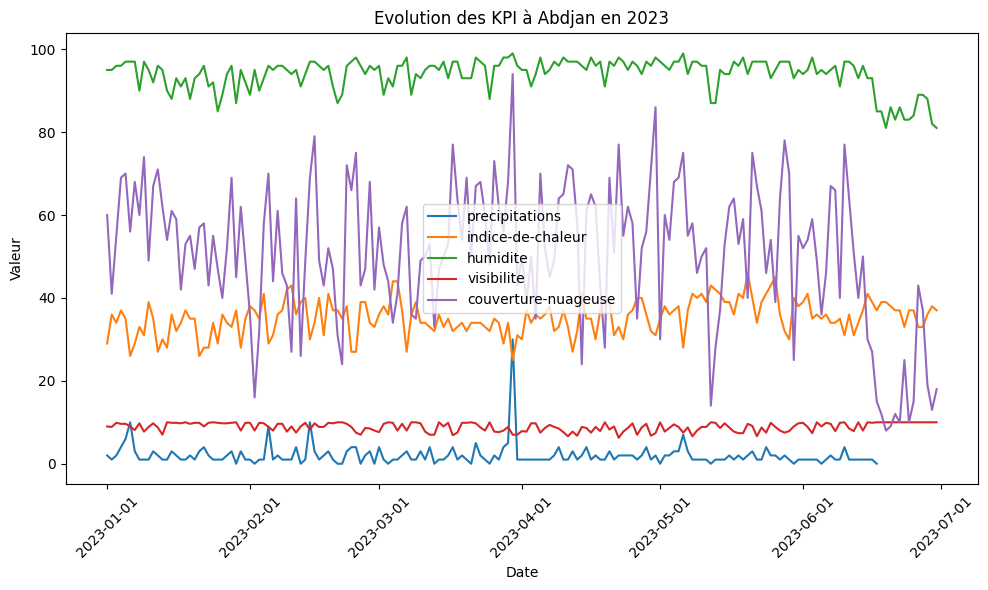

In [27]:
# On choisit la region d'Abidjan
data_abid = data.query('region == "Brazzaville"')

# Mettre la date comme index
data_abid = data_abid.set_index('date')

# Convertir les dates au format datetime
data_abid.index = [datetime.strptime(date, "%Y/%m/%d") for date in data_abid.index]

# Tracer le graphique
plt.figure(figsize=(10, 6))  # La taille du graphique

# Tracer les cinq colonnes sur le même graphique
plt.plot(data_abid.index, data_abid['precipitations'], label='precipitations')
plt.plot(data_abid.index, data_abid['indice-de-chaleur'], label='indice-de-chaleur')
plt.plot(data_abid.index, data_abid['humidite'], label='humidite')
plt.plot(data_abid.index, data_abid['visibilite'], label='visibilite')
plt.plot(data_abid.index, data_abid['couverture-nuageuse'], label='couverture-nuageuse')

# Légende
plt.legend()

# Ajuster le format des dates sur l'axe des abscisses
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Choix du pas pour les mois
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))  # Format des dates à afficher

# Inclinez les dates pour une meilleure lisibilité
plt.xticks(rotation=45)

# Titres et étiquettes des axes
plt.title('Evolution des KPI à Abdjan en 2023')
plt.xlabel('Date')
plt.ylabel('Valeur')

# Afficher le graphique
plt.tight_layout()  # Ajuster la disposition pour éviter les coupures d'étiquettes
plt.show()


<a id='conclu'></a>
## Conclusion

> Dans le cadre de ce travail de machine learning, notre objectif principal était de réaliser le web scraping d'un site de météo afin de collecter les données nécessaires pour une analyse statistique approfondie. Le web scraping est une technique essentielle pour extraire automatiquement des informations à partir de sources en ligne, dans ce cas précis, des données météorologiques.

> En tant qu'étudiant en statistique, l'objectif du web scraping était de rassembler un ensemble de données pertinentes et de qualité, représentant des informations météorologiques historiques ou en temps réel. Grâce à cette méthode, nous avons pu accumuler des données volumineuses et variées, essentielles pour alimenter nos modèles statistiques.